$$c = \sqrt{a^2 + b^2}$$
$$ \frac{k^2 + n^2}{\omega} = 1$$
\begin{equation}\label{1}
f(x) = \frac{A_0}{2} + \sum \limits_{n=1}^{\infty} A_n \cos \left( \frac{2 n \pi x}{\nu} - \alpha_n \right) 
\end{equation}

$$\mathop{\nabla}_{x}$$

$$A\left/ B^{\frac{C}{D}}\right/$$

![title](img/питон_декоратор.jpg)

![title](img/Untitled-4.png)

$$\mathop{\nabla}_{x}$$


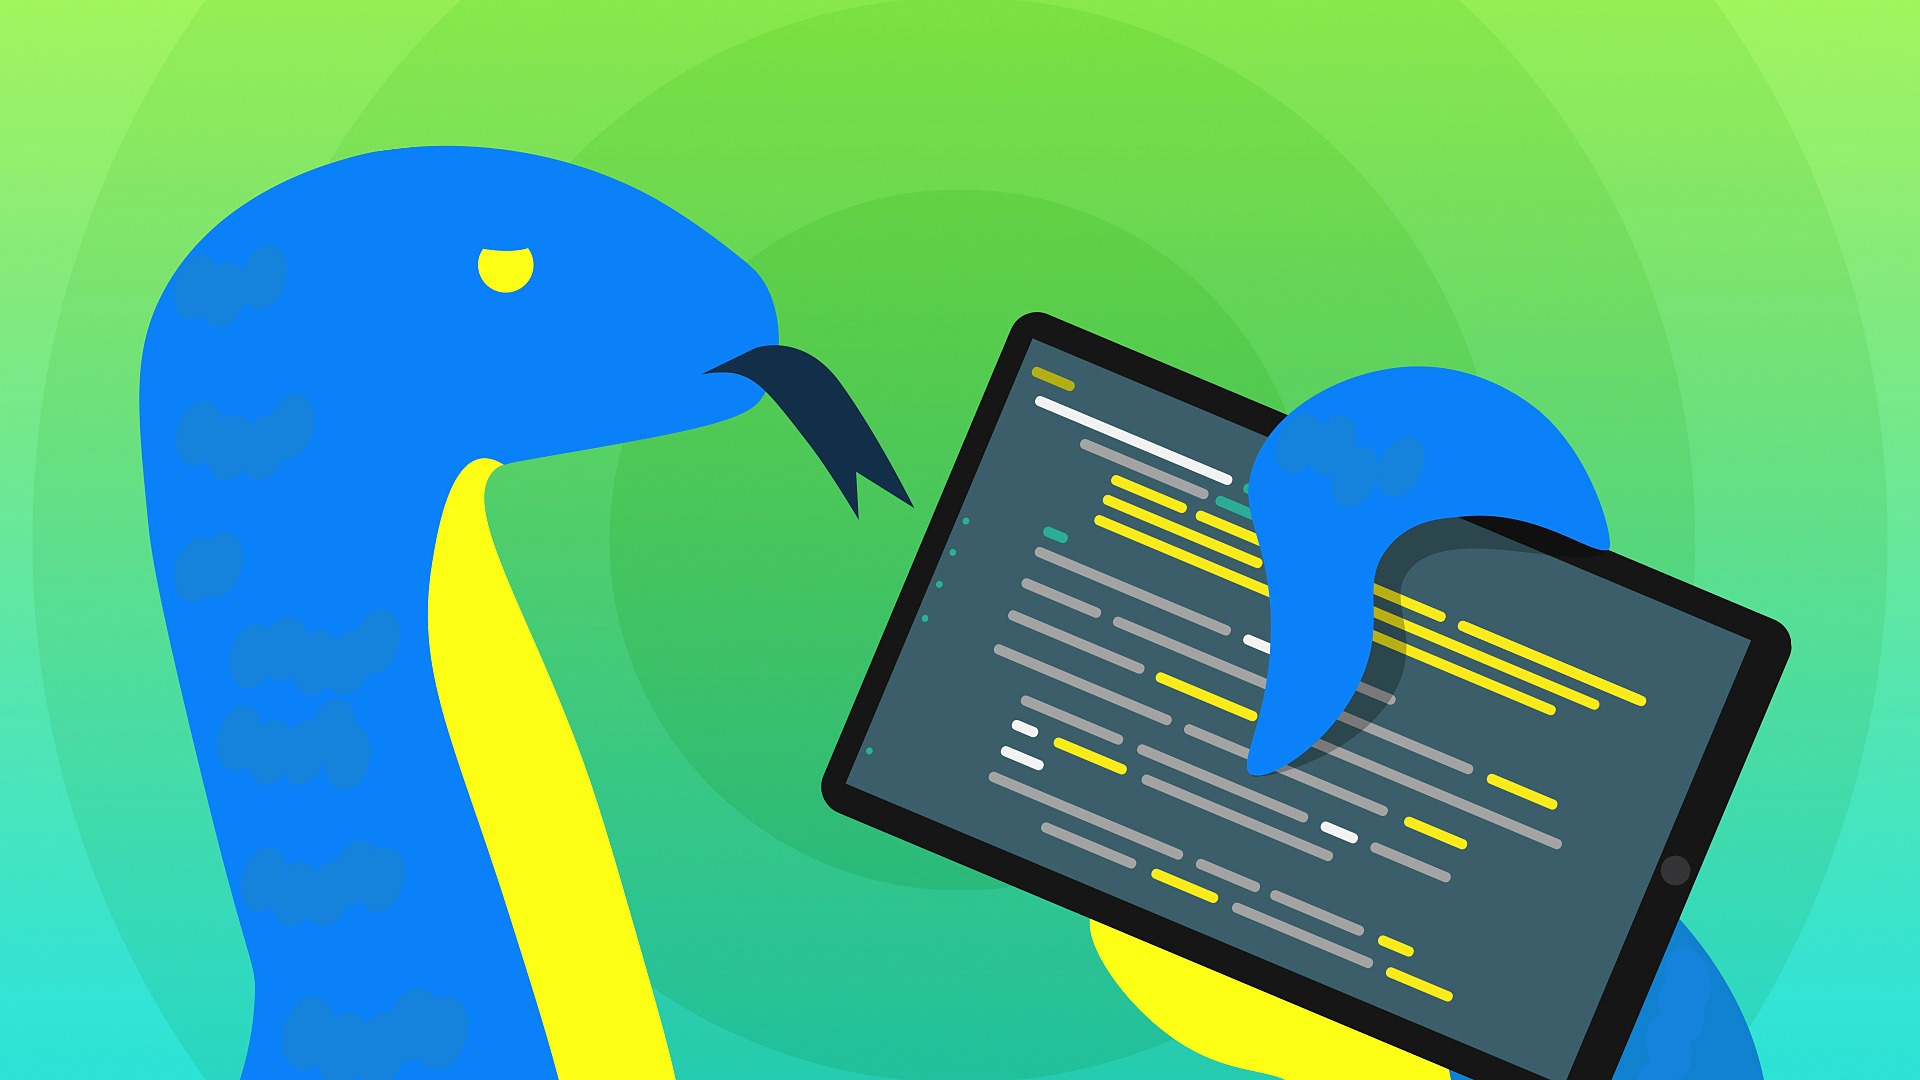

In [27]:
from IPython.display import Image

Image(filename="img/питон_декоратор.jpg", width=600, height=400)

In [29]:
from IPython.display import IFrame, display
#filepath = "http://wikipedia.org" # works with websites too!
filepath = "img/Untitled-3.pdf"
#IFrame(filepath, width=700, height=400)
Image(filename="img/Untitled-3.eps", width=600, height=400)

ValueError: Cannot embed the 'eps' image format

In [ ]:
http://detexify.kirelabs.org/classify.html

\begin{eqnarray} S_{\text{вых}}(x_2, y_2) = \iint dx_0 dy_0 A_0 g(x_0, y_0) \cdot h(x_2-x_0, y_2 -y_0) = \\
 = A_0 \underbrace{\iint dx_0 dy_0 \; g(x_0, y_0) 
\cdot h(x_2-x_0, y_2 -y_0)}_{\text{по определению это есть свёртка }} = A_0 g \otimes h 
\end{eqnarray}


(\ref{1})

\begin{equation}\label{eq:visc_to_inertia}
f(x) = \frac{\mu \nabla^{2}u}{\rho \left(Du\left/\!Dt\right.\right)} = \frac{\mu\left(k^2 + n^2\right)u }{\rho\omega u} = \frac{\nu\left(k^2 + n^2\right)}{\omega} = \frac{\nu\left(k^2 + n^2\right)^{1/2}}{\omega\left/\left(k^2 + n^2\right)^{1/2}\right. }
\end{equation}

$$\nu\equiv\frac{\mu}{\rho}$$



$$ \frac{k^2 + n^2}{\omega} = 1$$

In [ ]:
import math

lambda_x = 4
lambda_z = 5
period = 12 


mu = 1
rho = 1

nu = mu/rho

print(math.pi)

k = 2*math.pi / lambda_x
n = 2*math.pi / lambda_z
omega = 2*math.pi / period

eq = (nu*(k**2+n**2))/omega

print(k, n)
print(omega)
print(eq)

In [3]:
%%capture 
%matplotlib inline


# импорт всего что нужно
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# настройки для визуализации в jupiter`e
from IPython.display import HTML
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams["animation.html"] = "jshtml"  # for matplotlib 2.1 and above, uses JavaScript
#plt.rcParams["animation.html"] = "html5" # for matplotlib 2.0 and below, converts to x264 using ffmpeg video codec



# задание сетки пространственных координат и создание меша
xlist = np.linspace(0, 50, 200)
zlist = np.linspace(0, 20, 100)
X, Z = np.meshgrid(xlist, zlist)

# хз чо
fig, ax = plt.subplots()
#plt.close()

# задание параметров волны
import math
lx = 200 #горизонтальная длина волны
lz = 5 #вертикальная длина волны
T = 4 #период
kx = 2*math.pi/lx #горизонтальное волновое число
kz = 2*math.pi/lz #вертикальное волновое число
sigma = 2*math.pi/T #циклическая частота
delta_t = 1 #сколько длится один шаг по времени (можно игнорировать)
Wamp0 = 1 #амплитуда на нулевой высоте

H=7 #высота однородной атмосферы

#рассчет амплитуды от высоты (Z - у Шведа) - учтен рост с высотой по экспоненте
def Wamp(Z):
    return Wamp0*np.exp(Z/(2*H))

#рассчет волнового возмущения от высоты (w' - у Шведа)
def z_function(i, X, Z):
    W = Wamp(Z)*np.cos(sigma*i*delta_t-kx*X-kz*Z)
    return W

#задание уровней контурного графика - 
# если их не определить, то каждый кадр будет прорисовываться c разными уровнями и из-за этого моргать 
# как по-другому решить не знаю
lev=np.linspace(-6,6,32)


# функция для анимации каждого кадра
# можешь погуглить про matplotlib.animation.FuncAnimation чтобы понять как это работает
def animate(i, cont, ax, X, Z):

    # считаем амплитуду для i-ого кадра (i-ого момента времени)
    W = z_function(i, X, Z)
    
    # удаляет прошлые прорисованные кадры
    for c in cont.collections:
        try:
            c.remove()  # removes only the contours, leaves the rest intact
        except:
            pass
    # тоже что-то очищает (можно убрать)
    #ax.cla()
    # собственно рисование контура на i-ом кадре
    cont = ax.contourf(X, Z, W, levels = lev)

    # подписи осей и названия графика
    plt.title('t = %.2f:  %.2f' % (i, W[5,5]))
    plt.ylabel('z height, km')
    plt.xlabel('x, km')
    return cont


# перед анимацией надо создать первый контурный график, а потом везде на него ссылаться 
# (хотя наверное это не обязательно)
cont = ax.contourf(X, Z, z_function(0, X, Z), levels = lev)

# ряд времени (каждый кадрик это точка в этом ряду)
times = np.linspace(0, 10, 100)

# обьект анимации -рисуется в следующей ячейке
animation = FuncAnimation(fig,
                        func=animate,
                        frames=times,
                        fargs=(cont, ax, X, Z),
                        interval=100,
                        repeat=True,
                        #blit=True
                        )
# колорбар 
plt.colorbar(cont)
animation



In [4]:
animation

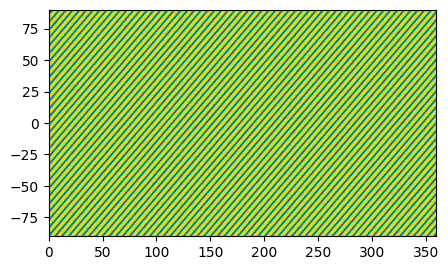

In [34]:
# задание сетки пространственных координат и создание меша
lat_list = np.linspace(-90, 90, 180)
lon_list = np.linspace(0, 360, 360)
z_list= np.linspace(0, 100, 1000)
lat, lon= np.meshgrid(lat_list, lon_list)

#print(lat)

# хз чо
fig2, ax2 = plt.subplots()

# собственно рисование контура
Wind=np.sin(lat-lon)

cont = ax2.contourf(lon, lat, Wind)
cont